In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

from evaluate import Mean_IoU, Dice_segmentation
from dataset import device, train_loader, val_loader, val_set, VisualizationUtils
from train import train
from test4 import VisionTransformerSegmentation, plot_attention_map
from inference_utils import plot_predictions
from patchification_utils import PatchificationUtils

## Inspecting the data

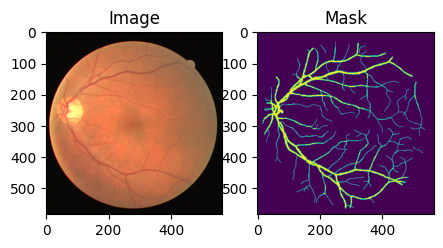

Image shape: (584, 565, 3)
Mask shape: (584, 565)


In [3]:
image_1 = np.array(Image.open('/Users/josephmargaryan/Desktop/computer_vision/DRIVE/training/images/21_training.tif'))
mask_1 = np.array(Image.open('/Users/josephmargaryan/Desktop/computer_vision/DRIVE/training/1st_manual/21_manual1.gif'))
fig, ax = plt.subplots(1, 2, figsize=(5, 5))
ax[0].imshow(image_1)
ax[0].set_title('Image')
ax[1].imshow(mask_1)
ax[1].set_title('Mask')
plt.show()
print(f"Image shape: {image_1.shape}\nMask shape: {mask_1.shape}")

## Inspecting data loaders after data augmentation

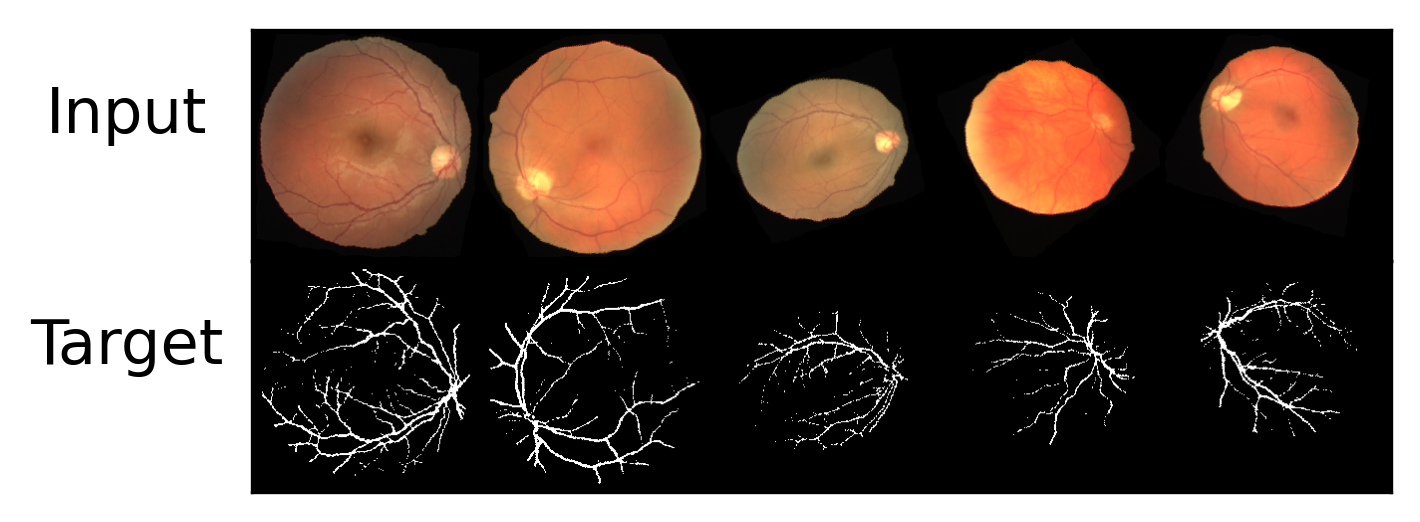

In [2]:
vis_utils = VisualizationUtils()

grids = vis_utils.create_segment_grids(train_loader, nrofItems=5, pad=4)
vis_utils.plot_grids(grids)

## Patchification

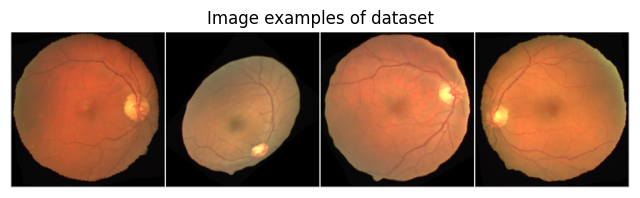

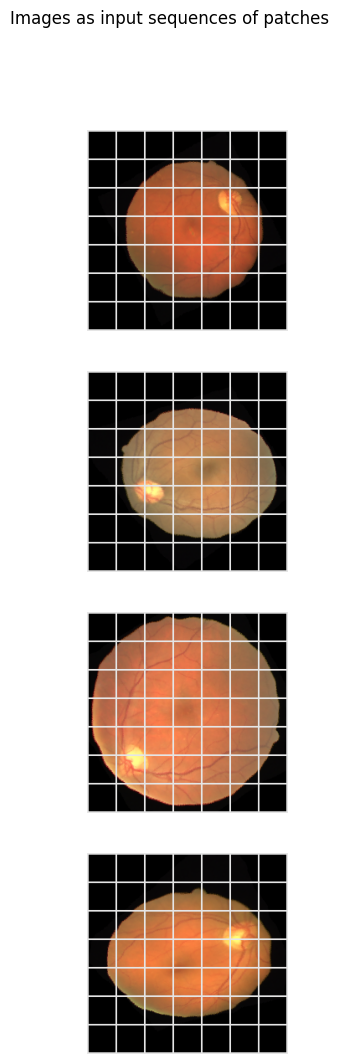

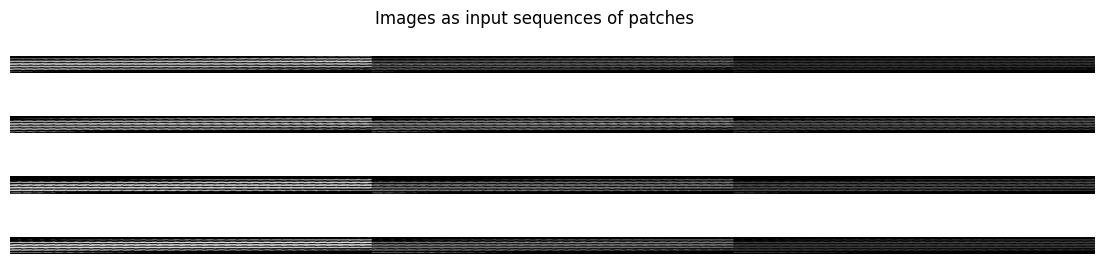

In [23]:
# Call the plot_image_examples function directly
PatchificationUtils.plot_image_examples(val_set, num_images=4)

# Call the visualize_image_patches function directly
PatchificationUtils.visualize_image_patches(val_set, patch_size=32, image_size=224, num_images=4)

# Call the visualize_patches_from_dataset function directly
PatchificationUtils.visualize_patches_from_dataset(val_set, patch_size=32, num_images=4)


## Training

In [25]:
configs = {
        'in_channels': 3,
        'patch_size': 4,
        'embed_dim': 96,
        'num_heads': 4,
        'mlp_dim': 192,
        'num_layers': 6,
        'num_classes': 1,
        'image_size': 224
}


# Instantiate Segformer model
model = VisionTransformerSegmentation(**configs)

trained_model = train(
    model=model,
    num_epochs=20,
    train_loader=train_loader,
    val_loader=val_loader
)
trained_model

  0%|          | 0/3 [00:00<?, ?it/s]

## Evaluating

In [6]:
mean_iou = Mean_IoU(model=trained_model, val_loader=val_loader)
print(f"Mean IoU: {mean_iou}")

generalized_dice = Dice_segmentation(model=trained_model, val_loader=val_loader)
print(f"Generalized Dice: {generalized_dice}")

100%|██████████| 1/1 [00:00<00:00,  1.30it/s]


Mean IoU: ('MeanIoU:', 0.0009769103489816189)


100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

Generalized Dice: ('Generelized Dice:', 0.0007557437056675553)
